In [1]:
import json as j
import requests
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
#import yfinance as yf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
import seaborn as sns
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)

2022-09-18 22:34:25.652546: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-18 22:34:25.652582: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = pd.read_csv('Data/FinalDataSet.csv').set_index('Date')
df

,WTI Spot Price ($ per barrel),WTI-Brent Price Spread ($),WTI Crack Spread,Brent Crack Spread,"OECD Petroleum Production, Annual, million barrels per day","OPEC Petroleum Production, Annual, million barrels per day","Rest of World Petroleum Production, Annual, million barrels per day","OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day","Non-OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day","China Import, Millions of tons",Kilian Global Economic Index,FEDFUNDS,U.S. ISM PMI Index,Henry Hub Natural Gas Spot Price Dollars per Million Btu,U.S. Total Crude Oil Inventory (Millions Barrels),U.S. Non-SPR Crude Oil Inventory (Millions Barrels),U.S. SPR Crude Oil Inventory (Millions Barrels),US Tight Oil Production (Millions of Barrels per day),Real Dollar Index,Closing Price: Gold ($ per ounce),Real GDP - Seasonally Adjusted (Billions of $),PPI by Commodity: Intermediate Demand by Commodity Type: Processed Energy Goods
Date,,,,,,,,,,,,,,,,,,,,,,
2000-08-25,32.46,0.69,10.173947,10.863947,22.818314,31.511831,24.253930,49.611187,28.462708,6.220000,10.250146,6.599460,49.900000,4.63,842.054,270.948,571.106,0.408969,111.419998,277.000000,13216.511054,106.664580
2000-09-01,33.08,-1.24,9.673125,8.433125,22.814929,31.525013,24.270018,49.619576,28.483413,6.220000,10.572120,6.588459,49.900000,4.66,844.797,273.691,571.106,0.408969,114.339996,273.299988,13225.700170,106.869191
2000-09-08,34.42,-2.01,8.446918,6.436918,22.811525,31.538174,24.286131,49.627926,28.504156,6.220000,10.838357,6.574116,49.820635,4.82,844.129,272.764,571.365,0.408969,115.940002,272.299988,13234.868962,107.065038
2000-09-15,34.70,1.44,8.275329,9.715329,22.808103,31.551314,24.302268,49.636235,28.524937,6.220000,11.046938,6.556328,49.738095,5.05,841.647,270.282,571.365,0.408969,113.559998,271.799988,13244.017092,107.252122
2000-09-22,35.49,2.40,7.588356,9.988356,22.804664,31.564433,24.318429,49.644504,28.545757,6.220000,11.195944,6.534990,49.700000,5.17,841.146,269.781,571.365,0.408969,113.250000,273.600006,13253.144218,107.430443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,103.89,-7.37,61.558067,54.188067,33.344364,35.028005,32.752883,46.628363,55.138453,45.687692,64.132896,0.668823,57.100000,5.41,976.951,412.371,564.580,7.855408,99.800003,1941.599976,19663.855949,291.673139
2022-04-08,99.21,-4.12,66.916327,62.796327,33.362655,35.014449,32.752999,46.621296,55.141093,45.720769,61.763815,0.693471,56.733396,6.08,982.434,421.753,560.681,7.867314,100.500000,1970.900024,19668.392999,294.449646
2022-04-15,101.46,-3.96,65.215571,61.255571,33.380901,35.000876,32.753134,46.614191,55.143643,45.753846,59.344427,0.718550,56.210452,6.64,969.713,413.733,555.980,7.879347,101.220001,1931.000000,19672.876981,297.257125


In [3]:
X = df[df.columns[1:]].values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

In [4]:
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(X_std) # this will fit and reduce dimensions
print(pca.n_components_) # one can print and see how many components are selected. In this case it is 4 same as above we saw in step 5

10


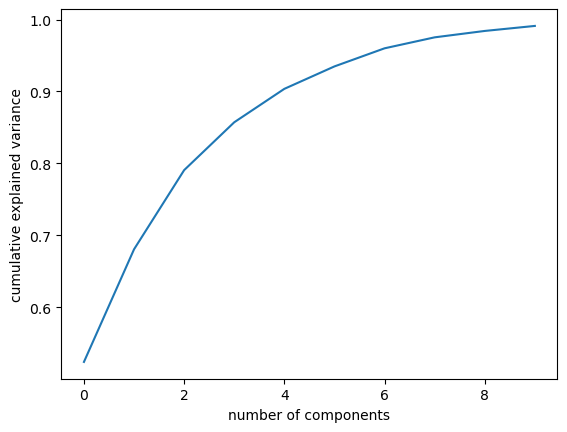

In [5]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [6]:
pd.DataFrame(pca.components_, columns = df.columns[1:])

,WTI-Brent Price Spread ($),WTI Crack Spread,Brent Crack Spread,"OECD Petroleum Production, Annual, million barrels per day","OPEC Petroleum Production, Annual, million barrels per day","Rest of World Petroleum Production, Annual, million barrels per day","OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day","Non-OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day","China Import, Millions of tons",Kilian Global Economic Index,FEDFUNDS,U.S. ISM PMI Index,Henry Hub Natural Gas Spot Price Dollars per Million Btu,U.S. Total Crude Oil Inventory (Millions Barrels),U.S. Non-SPR Crude Oil Inventory (Millions Barrels),U.S. SPR Crude Oil Inventory (Millions Barrels),US Tight Oil Production (Millions of Barrels per day),Real Dollar Index,Closing Price: Gold ($ per ounce),Real GDP - Seasonally Adjusted (Billions of $),PPI by Commodity: Intermediate Demand by Commodity Type: Processed Energy Goods
0,0.163320,-0.133520,-0.053556,-0.229171,-0.280554,-0.279961,0.261048,-0.297352,-0.282667,0.116419,0.187974,-0.112054,0.158764,-0.261699,-0.253225,-0.112980,-0.256109,0.069513,-0.282148,-0.284209,-0.209112
1,-0.106561,0.165915,0.119267,-0.276918,0.065984,0.156606,-0.096396,-0.050911,-0.121085,0.291149,-0.032437,0.088047,0.292363,0.039758,-0.215211,0.414448,-0.230159,-0.504303,0.055922,-0.062027,0.319066
2,0.197298,0.413040,0.549921,0.218198,-0.080547,-0.067238,0.159801,0.038012,0.121886,0.337984,0.270884,0.109367,0.230273,-0.082532,0.046838,-0.234049,0.140433,0.114090,-0.035955,0.146481,0.125429
3,-0.464883,0.428637,0.204428,-0.093097,-0.142014,-0.086589,-0.244383,-0.070296,-0.085314,-0.242076,-0.135458,-0.295186,-0.229191,-0.262698,-0.181694,-0.226948,-0.078229,0.093894,0.135999,-0.140750,0.163416
4,0.270144,0.123030,0.279416,-0.144517,0.154625,0.149744,0.035061,0.014599,-0.075154,-0.181899,0.118291,-0.693430,-0.009286,0.290560,0.198699,0.254566,-0.084559,0.057715,-0.123141,-0.012553,-0.130310
5,-0.398876,-0.130695,-0.358029,0.084077,0.013365,0.022882,0.011572,0.052329,0.092135,0.102424,0.597891,-0.377349,0.296645,-0.034614,0.008782,-0.081151,0.128635,-0.022033,0.090071,0.140718,0.159180
6,0.328301,-0.232360,-0.069090,0.177512,-0.155265,-0.009691,-0.153754,0.057378,0.118004,0.309564,-0.469990,-0.471957,0.133875,-0.201353,-0.134731,-0.181052,0.107909,-0.138005,0.191890,0.044479,0.136140
7,0.137010,-0.046375,0.025311,-0.013291,0.010921,0.033420,-0.065390,0.025037,-0.048235,-0.604127,-0.129744,0.113806,0.685879,-0.055841,-0.037774,-0.049571,0.022267,0.194990,-0.004076,-0.012657,0.242723
8,-0.440030,0.189284,-0.038118,0.097632,0.150819,-0.053061,0.435417,0.004189,-0.000189,0.100696,-0.457529,-0.109208,0.324176,0.063102,0.078047,0.000638,0.130472,-0.079100,-0.188905,0.043604,-0.370085
9,-0.094544,0.026158,-0.023719,0.030522,-0.422074,-0.221079,-0.122827,-0.150542,0.065073,0.113824,-0.059327,0.036216,0.189758,0.381917,0.488972,-0.022143,-0.323146,0.065862,0.373115,-0.170215,-0.060728


In [7]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns[1:]
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
most_important_names = [*set(most_important_names)]
most_important_names


['FEDFUNDS',
 'Non-OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day',
 'WTI-Brent Price Spread ($)',
 'U.S. ISM PMI Index',
 'Henry Hub Natural Gas Spot Price Dollars per Million Btu',
 'Real Dollar Index',
 'U.S. Non-SPR Crude Oil Inventory (Millions Barrels)',
 'Brent Crack Spread']

In [8]:
df = df[[df.columns[0]] + most_important_names]
df

,WTI Spot Price ($ per barrel),FEDFUNDS,"Non-OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day",WTI-Brent Price Spread ($),U.S. ISM PMI Index,Henry Hub Natural Gas Spot Price Dollars per Million Btu,Real Dollar Index,U.S. Non-SPR Crude Oil Inventory (Millions Barrels),Brent Crack Spread
Date,,,,,,,,,
2000-08-25,32.46,6.599460,28.462708,0.69,49.900000,4.63,111.419998,270.948,10.863947
2000-09-01,33.08,6.588459,28.483413,-1.24,49.900000,4.66,114.339996,273.691,8.433125
2000-09-08,34.42,6.574116,28.504156,-2.01,49.820635,4.82,115.940002,272.764,6.436918
2000-09-15,34.70,6.556328,28.524937,1.44,49.738095,5.05,113.559998,270.282,9.715329
2000-09-22,35.49,6.534990,28.545757,2.40,49.700000,5.17,113.250000,269.781,9.988356
...,...,...,...,...,...,...,...,...,...
2022-04-01,103.89,0.668823,55.138453,-7.37,57.100000,5.41,99.800003,412.371,54.188067
2022-04-08,99.21,0.693471,55.141093,-4.12,56.733396,6.08,100.500000,421.753,62.796327
2022-04-15,101.46,0.718550,55.143643,-3.96,56.210452,6.64,101.220001,413.733,61.255571


In [9]:
# df = pd.read_csv('FinalDataSet.csv').set_index('Date')
# df

In [10]:
# Model
def model(window_size, n_features, patience, epochs):
    neurons = n_features*window_size
    # 128,128,64
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(128, input_shape = (window_size, n_features), return_sequences = True))
    model.add(tf.keras.layers.LeakyReLU(alpha = .5))
    
    model.add(tf.keras.layers.LSTM(128, return_sequences = True))
    model.add(tf.keras.layers.LeakyReLU(alpha = .5))
    
    model.add(tf.keras.layers.Dropout(.3))
    model.add(tf.keras.layers.LSTM(64, return_sequences = False))
    model.add(tf.keras.layers.Dropout(.3))
    model.add(tf.keras.layers.Dense(1))

    model.compile(loss = tf.losses.MeanSquaredError(),
                 optimizer = tf.optimizers.Adam(),
                 metrics = [tf.metrics.MeanAbsoluteError()])

    
    
    return model

In [11]:
# Initialize parameters
window_size = 2 # Lookback periods
batch_size = 64  # Batch size to feed model
patience = 50   # early stopping occurs if the number of non-improving iterations surpasses this limit
epochs = 50     # Number of model iterations



test_size = .3

# Train_Test Split

test_size = test_size
Y = df[[df.columns[0]]]
X = df[df.columns[1:]]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, shuffle = False)


# Scale
scaler = MinMaxScaler(feature_range = (0,1))
x_train_scaled = scaler.fit_transform(x_train)
y_train_scaled = scaler.fit_transform(y_train)
x_test_scaled = scaler.fit_transform(x_test)
y_test_scaled = scaler.fit_transform(y_test)


In [12]:
# Create TimeseriesGenerator 
window_size = window_size 
batch_size = batch_size
n_features = x_train.shape[1]
train_generator = TimeseriesGenerator(x_train_scaled, y_train_scaled, length = window_size, batch_size = batch_size)
test_generator = TimeseriesGenerator(x_test_scaled, y_test_scaled, length = window_size, batch_size = batch_size)


In [13]:
# Initialize Model
model = model(window_size = window_size, n_features = n_features, patience = patience, epochs = epochs)




# Intialize early stopping 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = patience, mode = 'min', restore_best_weights = False)



# fit model
history = model.fit(train_generator, epochs = epochs, validation_data = test_generator, shuffle = False,
                             callbacks = [early_stopping])

# Make predictions
predictions = model.predict(test_generator)

# Convert Predictions back to initial scale
inverse_pred = scaler.inverse_transform(predictions)
inverse_pred = [inverse_pred[i][0] for i in range(len(inverse_pred))]

# Create Final Dataframe with predictions
df_pred = pd.DataFrame({'Date' : x_test.iloc[window_size:].index, 'WTI Price Predictions': inverse_pred}).set_index('Date')
df_final = pd.concat([df_pred, x_test.iloc[window_size:, :]], axis = 1)
df_final = pd.concat([y_test[window_size:], df_final], axis = 1)


2022-09-18 22:34:28.523137: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-18 22:34:28.523176: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-18 22:34:28.523202: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-keon-2eetebari): /proc/driver/nvidia/version does not exist
2022-09-18 22:34:28.523560: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
13/13 [==============================] - 8s 140ms/step - loss: 0.1293 - mean_absolute_error: 0.3015 - val_loss: 0.0690 - val_mean_absolute_error: 0.2316
Epoch 2/50
13/13 [==============================] - 0s 20ms/step - loss: 0.0422 - mean_absolute_error: 0.1727 - val_loss: 0.0178 - val_mean_absolute_error: 0.1019
Epoch 3/50
13/13 [==============================] - 0s 20ms/step - loss: 0.0749 - mean_absolute_error: 0.2370 - val_loss: 0.0352 - val_mean_absolute_error: 0.1547
Epoch 4/50
13/13 [==============================] - 0s 21ms/step - loss: 0.0478 - mean_absolute_error: 0.1886 - val_loss: 0.0250 - val_mean_absolute_error: 0.1282
Epoch 5/50
13/13 [==============================] - 0s 21ms/step - loss: 0.0383 - mean_absolute_error: 0.1692 - val_loss: 0.0195 - val_mean_absolute_error: 0.1111
Epoch 6/50
13/13 [==============================] - 0s 21ms/step - loss: 0.0355 - mean_absolute_error: 0.1610 - val_loss: 0.0271 - val_mean_absolute_error: 0.1403
Epoch 7/50
13/13 [===

6/6 [==============================] - 1s 7ms/step


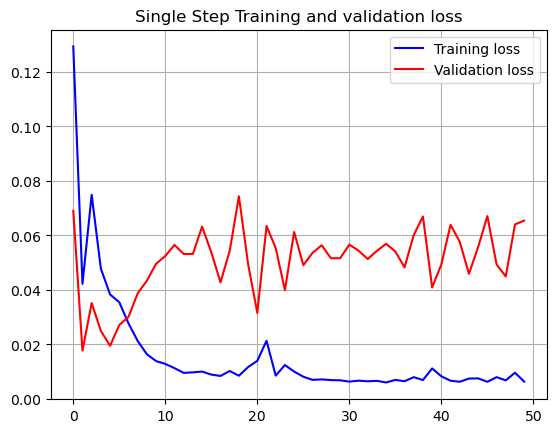

In [14]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

plot_train_history(history,
                   'Single Step Training and validation loss')


In [15]:
df_final

,WTI Spot Price ($ per barrel),WTI Price Predictions,FEDFUNDS,"Non-OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day",WTI-Brent Price Spread ($),U.S. ISM PMI Index,Henry Hub Natural Gas Spot Price Dollars per Million Btu,Real Dollar Index,U.S. Non-SPR Crude Oil Inventory (Millions Barrels),Brent Crack Spread
Date,,,,,,,,,,
2015-11-13,42.70,6.649917,0.125872,50.173628,-2.05,49.719048,2.11,99.570000,455.074,15.176207
2015-11-20,40.62,6.506610,0.130561,50.197946,-0.92,49.020635,2.09,100.019997,456.035,18.264927
2015-11-27,40.49,5.776517,0.136312,50.222225,-3.16,48.600000,2.15,98.349998,457.212,16.081391
2015-12-04,40.40,5.518157,0.143046,50.246463,-2.01,48.600000,2.13,97.570000,453.553,17.295599
2015-12-11,36.93,8.388103,0.150682,50.270661,-1.83,48.490625,1.96,98.699997,458.354,20.967551
...,...,...,...,...,...,...,...,...,...,...
2022-04-01,103.89,34.035011,0.668823,55.138453,-7.37,57.100000,5.41,99.800003,412.371,54.188067
2022-04-08,99.21,35.148087,0.693471,55.141093,-4.12,56.733396,6.08,100.500000,421.753,62.796327
2022-04-15,101.46,28.104319,0.718550,55.143643,-3.96,56.210452,6.64,101.220001,413.733,61.255571


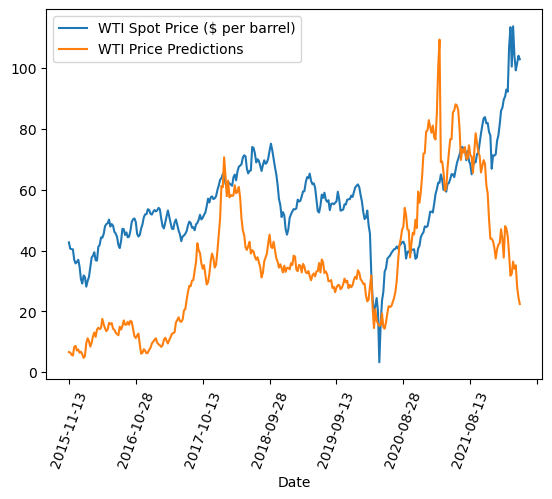

In [16]:
df_final[df_final.columns[[0,1]]].plot()
plt.xticks(rotation=70);

13/13 [==============================] - 0s 7ms/step


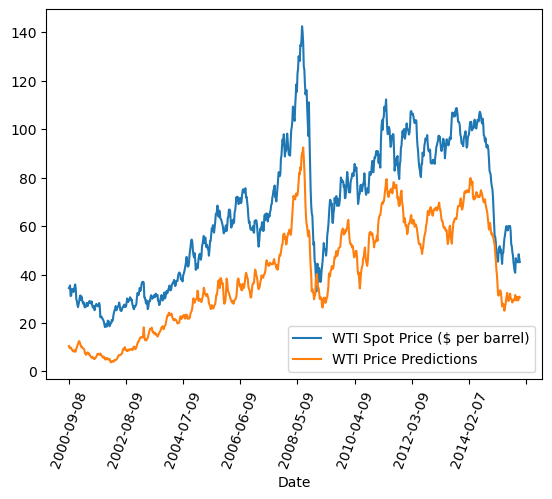

In [17]:
predictions = model.predict(train_generator)
#print(predictions)
inverse_pred = scaler.inverse_transform(predictions)
#print(inverse_pred)
#inverse_pred

inverse_pred = [inverse_pred[i][0] for i in range(len(inverse_pred))]

df_pred = pd.DataFrame({'Date' : x_train.iloc[window_size:].index, 'WTI Price Predictions': inverse_pred}).set_index('Date')
df_final = pd.concat([df_pred, x_train.iloc[window_size:, :]], axis = 1)
df_final = pd.concat([y_train[window_size:], df_final], axis = 1)

df_final[df_final.columns[[0,1]]].plot()
plt.xticks(rotation=70);

In [18]:
df_final

,WTI Spot Price ($ per barrel),WTI Price Predictions,FEDFUNDS,"Non-OECD Petroleum (Crude Oil) Consumption, Annual, million barrels per day",WTI-Brent Price Spread ($),U.S. ISM PMI Index,Henry Hub Natural Gas Spot Price Dollars per Million Btu,Real Dollar Index,U.S. Non-SPR Crude Oil Inventory (Millions Barrels),Brent Crack Spread
Date,,,,,,,,,,
2000-09-08,34.42,10.480792,6.574116,28.504156,-2.01,49.820635,4.82,115.940002,272.764,6.436918
2000-09-15,34.70,9.808002,6.556328,28.524937,1.44,49.738095,5.05,113.559998,270.282,9.715329
2000-09-22,35.49,9.544610,6.534990,28.545757,2.40,49.700000,5.17,113.250000,269.781,9.988356
2000-09-29,31.13,9.873004,6.510000,28.566614,1.72,49.700000,5.21,114.849998,270.873,13.766000
2000-10-06,31.27,9.753358,6.480541,28.587510,1.44,49.700000,5.20,115.860001,271.752,13.438261
...,...,...,...,...,...,...,...,...,...,...
2015-09-25,45.57,30.731005,0.113251,50.002292,-1.76,50.200000,2.61,95.830002,425.988,14.782007
2015-10-02,45.00,29.310558,0.114345,50.026886,-1.99,50.200000,2.49,94.809998,429.028,14.666517
2015-10-09,48.36,29.793983,0.115561,50.051441,-2.97,50.175859,2.38,94.540001,436.590,9.918771
